In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import streamlit as st
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as tkr
import plotly.express as px




In [2]:
# load the main file
df = pd.read_csv('Superstore.csv', encoding='latin-1')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [6]:
df['Order Date'].agg(['min','max'])

min   2014-01-03
max   2017-12-30
Name: Order Date, dtype: datetime64[ns]

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df['Profit_%']=df['Profit']/df['Sales']

In [9]:
df['Order_Year']=df['Order Date'].dt.year
df['Order_Month']=df['Order Date'].dt.month
df['Order_Day']=df['Order Date'].dt.day

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_%,Order_Year,Order_Month,Order_Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,2016,11,8
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,2016,11,8
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,2016,6,12
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,2015,10,11
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,2015,10,11


# RFM Analysis

In [11]:
# create time_difference to capture part of data below
df["time_difference"] = df['Order Date'].max() - df["Order Date"]

In [12]:
#last year
df["last_year"] = df["time_difference"] <= timedelta(days=365)

In [13]:
df_RFM = df[df['last_year']==True].copy()

In [14]:
df_RFM['Recency'] = (df_RFM['Order Date'].max() - df_RFM['Order Date']).dt.days

In [15]:
df_RFM.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_%,Order_Year,Order_Month,Order_Day,time_difference,last_year,Recency
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,0.350000,2017,4,15,259 days,True,259
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,-0.014286,2017,7,16,167 days,True,167
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,0.337500,2017,10,19,72 days,True,72
41,42,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,0.112500,2017,9,10,111 days,True,111
43,44,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,32935,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,0.100000,2017,9,19,102 days,True,102


### Using group by for each customer we need we create three now columns as following

 -Recency: for each customer snapshot date – latest purchase difference in days
 
 -Frequency: for each customer count of how many invoices are issued for him
 
 -Monetary Value: for each customer sum of amount spent

In [16]:
df_RFM_Sales = df_RFM.groupby(['Customer ID']).agg({'Recency': np.min,
                                           'Order Date':pd.Series.nunique,
                                           'Sales':np.sum}).reset_index()

df_RFM_Sales

,Customer ID,Recency,Order Date,Sales
0,AA-10315,184,1,374.480
1,AA-10375,19,2,206.732
2,AA-10480,259,1,15.552
3,AA-10645,55,1,12.960
4,AB-10060,54,4,2936.264
...,...,...,...,...
689,XP-21865,43,4,449.312
690,YC-21895,4,1,750.680
691,YS-21880,9,5,5340.264
692,ZC-21910,54,4,227.066


In [17]:
#Rename columns
df_RFM_Sales.rename(columns={'Recency':'Recency','Order Date':'Frequency','Sales':'Monetary'},inplace= True)

df_RFM_Sales

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,184,1,374.480
1,AA-10375,19,2,206.732
2,AA-10480,259,1,15.552
3,AA-10645,55,1,12.960
4,AB-10060,54,4,2936.264
...,...,...,...,...
689,XP-21865,43,4,449.312
690,YC-21895,4,1,750.680
691,YS-21880,9,5,5340.264
692,ZC-21910,54,4,227.066


### We have now calculated our values. But those aggregations are absolut and hard to explain as is. It is better to normalize our scores replacing those values with relative once with respect to the distribution

### Pandas qcut splits numeric columns into quartiles.


### For Recency and Frequency columns, the higher values (top quartile) are assigned with indicator 4 and lowest to 1. Higher values imply that customers have spent more money to our products or bought more often and the 1-4 score is assigned accordingly

### The opposite logic is applied for recency as higher values mean that many days have passed since last purchase. Thus, customers with high values (top quartile) take score 1 and those with the smallest values 4.

In [18]:
# Create Scores RFM scores based on quantiles of distribution

#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
df_RFM_Sales["recency_score"] = pd.qcut(df_RFM_Sales['Recency'].rank(method="first"),
                                  4,
                                  labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
df_RFM_Sales["frequency_score"] = pd.qcut(df_RFM_Sales["Frequency"].rank(method="first"),
                                    4,
                                    labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
df_RFM_Sales["monetary_score"] = pd.qcut(df_RFM_Sales["Monetary"].rank(method="first"),
                                   4,
                                   labels=[1, 2, 3, 4])

df_RFM_Sales.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,AA-10315,184,1,374.480,1,1,2
1,AA-10375,19,2,206.732,4,2,2
2,AA-10480,259,1,15.552,1,1,1
3,AA-10645,55,1,12.960,3,1,1
4,AB-10060,54,4,2936.264,3,4,4


## Calculate total RFM score for each customer

In [19]:
df_RFM_Sales["RFM_Segment"] = df_RFM_Sales["recency_score"].astype(str) + df_RFM_Sales[
    "frequency_score"].astype(str) + df_RFM_Sales["monetary_score"].astype(str)

df_RFM_Sales['RFM_Score'] = df_RFM_Sales[[
    'recency_score', 'frequency_score', 'monetary_score'
]].sum(axis=1)
df_RFM_Sales.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score
0,AA-10315,184,1,374.480,1,1,2,112,4
1,AA-10375,19,2,206.732,4,2,2,422,8
2,AA-10480,259,1,15.552,1,1,1,111,3
3,AA-10645,55,1,12.960,3,1,1,311,5
4,AB-10060,54,4,2936.264,3,4,4,344,11


### Split customers to segments and give indicative names (labeling appoaches may vary for this step)


In [20]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}
df_RFM_Sales['Segment_labels'] = df_RFM_Sales['RFM_Segment']
df_RFM_Sales['Segment_labels'] = df_RFM_Sales['Segment_labels'].replace(segt_map, regex=True)
df_RFM_Sales.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,Segment_labels
0,AA-10315,184,1,374.480,1,1,2,112,4,Need Activation
1,AA-10375,19,2,206.732,4,2,2,422,8,Medium New
2,AA-10480,259,1,15.552,1,1,1,111,3,Need Activation
3,AA-10645,55,1,12.960,3,1,1,311,5,Low Loyal
4,AB-10060,54,4,2936.264,3,4,4,344,11,VIP


In [21]:
seg_pareto = df_RFM_Sales.groupby(["Segment_labels"]).agg({'Monetary': np.sum,
                 
                                                           "Customer ID": pd.Series.nunique}).reset_index()

seg_pareto

,Segment_labels,Monetary,Customer ID
0,High Loyal,17645.3300,19
1,High New,45513.4775,51
2,High Promising,66972.3780,70
3,Low Loyal,7023.4930,84
4,Low New,1562.1958,25
5,Medium Loyal,13509.5974,34
6,Medium New,16026.5850,46
7,Medium Potential,20095.6898,47
8,Need Activation,53301.1010,144
9,Top Recent,212741.5742,66


In [22]:
seg_pareto["Monetary%"] = seg_pareto["Monetary"]/seg_pareto["Monetary"].sum()
seg_pareto = seg_pareto.sort_values(by=['Monetary%'], ascending=False)
seg_pareto["CumulativePercentage"] = (seg_pareto["Monetary"].cumsum()/ 
                                      seg_pareto["Monetary"].sum()*100).round(2)
seg_pareto["CumulativeSum"] = (seg_pareto["Customer ID"].cumsum()/ 
                                      seg_pareto["Customer ID"].sum()*100).round(2)

seg_pareto.reset_index()

,index,Segment_labels,Monetary,Customer ID,Monetary%,CumulativePercentage,CumulativeSum
0,9,Top Recent,212741.5742,66,0.289554,28.96,9.51
1,11,VIP,205052.9625,78,0.279090,56.86,20.75
2,10,Top at Risk,75276.4130,30,0.102456,67.11,25.07
3,2,High Promising,66972.3780,70,0.091154,76.23,35.16
4,8,Need Activation,53301.1010,144,0.072546,83.48,55.91
5,1,High New,45513.4775,51,0.061947,89.67,63.26
6,7,Medium Potential,20095.6898,47,0.027351,92.41,70.03
7,0,High Loyal,17645.3300,19,0.024016,94.81,72.77
8,6,Medium New,16026.5850,46,0.021813,96.99,79.39
9,5,Medium Loyal,13509.5974,34,0.018387,98.83,84.29


# Repeat the same procedure with Sum of Profit as Monetary

In [23]:
df_RFM_Profit = df_RFM.groupby(['Customer ID']).agg({'Recency': np.min,
                                           'Order Date':pd.Series.nunique,
                                           'Profit':np.sum}).reset_index()
df_RFM_Profit

,Customer ID,Recency,Order Date,Profit
0,AA-10315,184,1,96.5050
1,AA-10375,19,2,68.9195
2,AA-10480,259,1,5.4432
3,AA-10645,55,1,6.2208
4,AB-10060,54,4,477.8292
...,...,...,...,...
689,XP-21865,43,4,80.1054
690,YC-21895,4,1,37.5340
691,YS-21880,9,5,1524.1125
692,ZC-21910,54,4,62.3330


In [24]:
#Rename columns
df_RFM_Profit.rename(columns={'Recency':'Recency','Order Date':'Frequency','Profit':'Monetary'},inplace= True)

df_RFM_Profit

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,184,1,96.5050
1,AA-10375,19,2,68.9195
2,AA-10480,259,1,5.4432
3,AA-10645,55,1,6.2208
4,AB-10060,54,4,477.8292
...,...,...,...,...
689,XP-21865,43,4,80.1054
690,YC-21895,4,1,37.5340
691,YS-21880,9,5,1524.1125
692,ZC-21910,54,4,62.3330


In [25]:
# Create Scores RFM scores based on quantiles of distribution

#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
df_RFM_Profit["recency_score"] = pd.qcut(df_RFM_Profit['Recency'].rank(method="first"),
                                  4,
                                  labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
df_RFM_Profit["frequency_score"] = pd.qcut(df_RFM_Profit["Frequency"].rank(method="first"),
                                    4,
                                    labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
df_RFM_Profit["monetary_score"] = pd.qcut(df_RFM_Sales["Monetary"].rank(method="first"),
                                   4,
                                   labels=[1, 2, 3, 4])

df_RFM_Profit.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,AA-10315,184,1,96.5050,1,1,2
1,AA-10375,19,2,68.9195,4,2,2
2,AA-10480,259,1,5.4432,1,1,1
3,AA-10645,55,1,6.2208,3,1,1
4,AB-10060,54,4,477.8292,3,4,4


## Calculate total RFM score for each customer

In [26]:
df_RFM_Profit["RFM_Segment"] = df_RFM_Profit["recency_score"].astype(str) + df_RFM_Profit[
    "frequency_score"].astype(str) + df_RFM_Profit["monetary_score"].astype(str)

df_RFM_Profit['RFM_Score'] = df_RFM_Profit[[
    'recency_score', 'frequency_score', 'monetary_score'
]].sum(axis=1)
df_RFM_Profit.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score
0,AA-10315,184,1,96.5050,1,1,2,112,4
1,AA-10375,19,2,68.9195,4,2,2,422,8
2,AA-10480,259,1,5.4432,1,1,1,111,3
3,AA-10645,55,1,6.2208,3,1,1,311,5
4,AB-10060,54,4,477.8292,3,4,4,344,11


### Split customers to segments and give indicative names (labeling appoaches may vary for this step)


In [27]:
df_RFM_Profit['Segment_labels'] = df_RFM_Profit['RFM_Segment']
df_RFM_Profit['Segment_labels'] = df_RFM_Profit['Segment_labels'].replace(segt_map, regex=True)
df_RFM_Profit.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,Segment_labels
0,AA-10315,184,1,96.5050,1,1,2,112,4,Need Activation
1,AA-10375,19,2,68.9195,4,2,2,422,8,Medium New
2,AA-10480,259,1,5.4432,1,1,1,111,3,Need Activation
3,AA-10645,55,1,6.2208,3,1,1,311,5,Low Loyal
4,AB-10060,54,4,477.8292,3,4,4,344,11,VIP


In [28]:
seg_pareto_profit = df_RFM_Profit.groupby(["Segment_labels"]).agg({'Monetary': np.sum,
                 
                                                           "Customer ID": pd.Series.nunique}).reset_index()

seg_pareto_profit

,Segment_labels,Monetary,Customer ID
0,High Loyal,996.2479,19
1,High New,3744.3159,51
2,High Promising,5138.4519,70
3,Low Loyal,1405.5782,84
4,Low New,402.5321,25
5,Medium Loyal,1643.3366,34
6,Medium New,2646.0766,46
7,Medium Potential,2760.2007,47
8,Need Activation,6968.5530,144
9,Top Recent,31163.5650,66


In [29]:
seg_pareto_profit["Monetary%"] = seg_pareto_profit["Monetary"]/seg_pareto_profit["Monetary"].sum()
seg_pareto_profit = seg_pareto_profit.sort_values(by=['Monetary%'], ascending=False)
seg_pareto_profit["CumulativePercentage"] = (seg_pareto_profit["Monetary"].cumsum()/ 
                                      seg_pareto_profit["Monetary"].sum()*100).round(2)
seg_pareto_profit["CumulativeSum"] = (seg_pareto_profit["Customer ID"].cumsum()/ 
                                      seg_pareto_profit["Customer ID"].sum()*100).round(2)

seg_pareto_profit.reset_index()

,index,Segment_labels,Monetary,Customer ID,Monetary%,CumulativePercentage,CumulativeSum
0,9,Top Recent,31163.5650,66,0.332751,33.28,9.51
1,11,VIP,22223.6488,78,0.237294,57.00,20.75
2,10,Top at Risk,14561.8696,30,0.155485,72.55,25.07
3,8,Need Activation,6968.5530,144,0.074407,79.99,45.82
4,2,High Promising,5138.4519,70,0.054866,85.48,55.91
5,1,High New,3744.3159,51,0.039980,89.48,63.26
6,7,Medium Potential,2760.2007,47,0.029472,92.43,70.03
7,6,Medium New,2646.0766,46,0.028254,95.25,76.66
8,5,Medium Loyal,1643.3366,34,0.017547,97.01,81.56
9,3,Low Loyal,1405.5782,84,0.015008,98.51,93.66


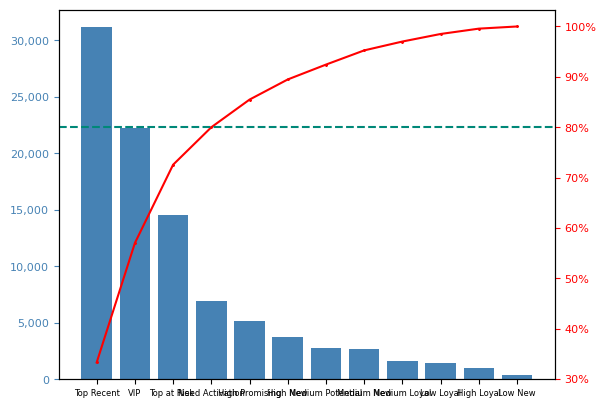

In [30]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(seg_pareto_profit['Segment_labels'], seg_pareto_profit['Monetary'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(seg_pareto_profit['Segment_labels'], seg_pareto_profit['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 6)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()

# EDA
## Top 10 States by Sales

<Axes: ylabel='State'>

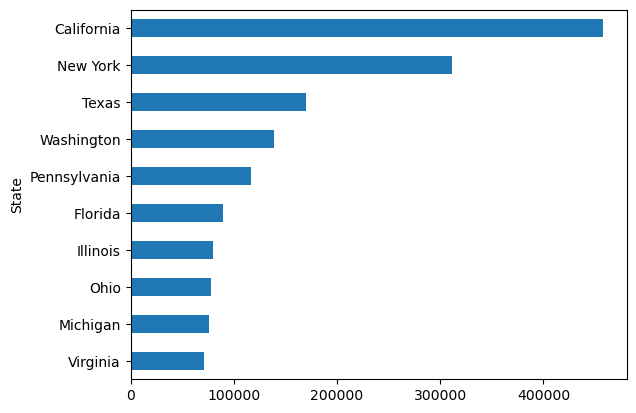

In [31]:
df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(10).plot.barh()

## Top 10 States by Profit

<Axes: ylabel='State'>

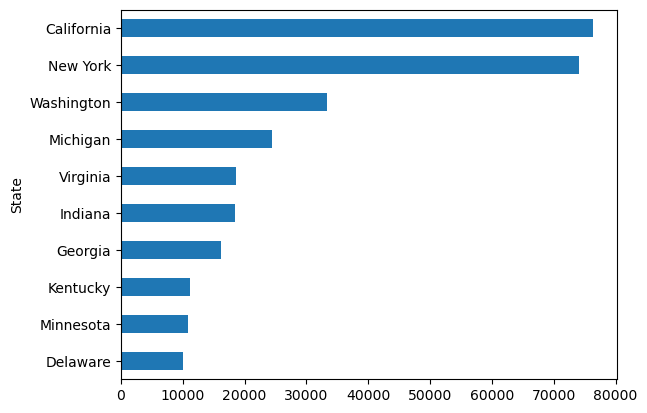

In [32]:
df.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(10).plot.barh()

# Sales and Profit scatter plot

In [33]:
df2=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum())

df2['Profit']=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum())

In [34]:
df2['Profit'].max()

8981.323900000001

In [35]:
df2['Profit'].min()

-6626.389499999999

In [36]:
df2['Sales'].max()

25043.05

(-7500.0, 9500.0)

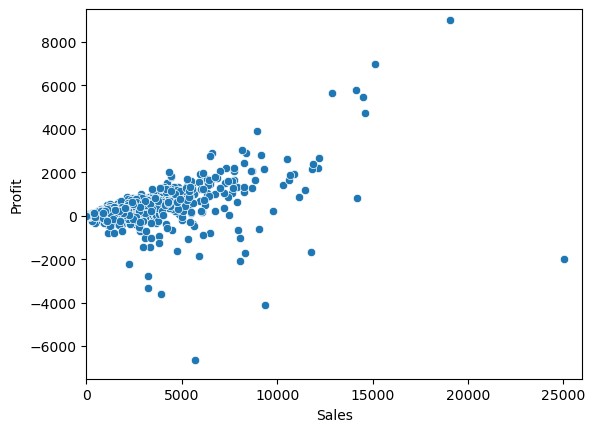

In [37]:
sns.scatterplot(data=df2,x='Sales',y='Profit')
plt.xlim(0, 26000)
plt.ylim(-7500, 9500)

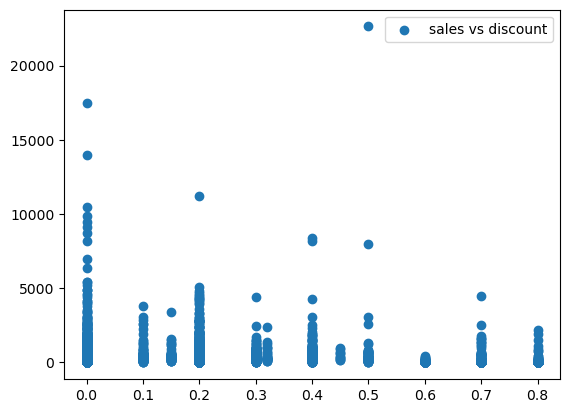

In [38]:
plt.scatter(y=df['Sales'],x=df['Discount'],label="sales vs discount")
plt.legend()
plt.show();

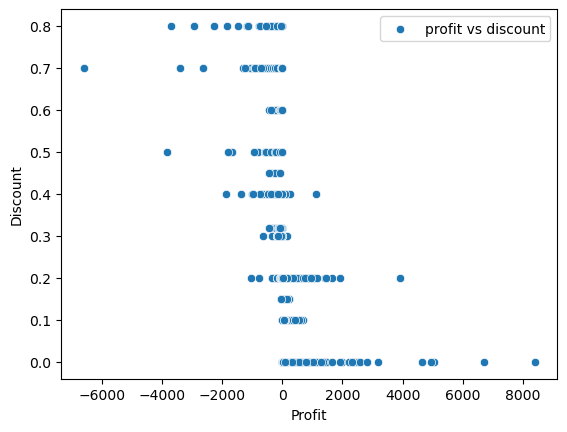

In [39]:
sns.scatterplot(x=df['Profit'],y=df['Discount'],label="profit vs discount")
plt.legend()
plt.show();